### Importations

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

### Parameteres

In [49]:
file_path = "../artifacts/crypto_data.csv"
sequence_length = 60 
test_size = 0.2
random_state = 42
epochs = 100
batch_size = 32

### Load and preprocess binance data

In [51]:
data = pd.read_csv(file_path)

# Extraction et normalisation de la colonne 'Close'
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
close_scaled = scaler.fit_transform(close_prices)

# Création des séquences
X, y = [], []
for i in range(sequence_length, len(close_scaled)):
    X.append(close_scaled[i-sequence_length:i, 0])
    y.append(close_scaled[i, 0])

# Conversion en arrays numpy et reshaping
X = np.array(X).reshape(-1, sequence_length, 1)
y = np.array(y)

# Split train/test

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=test_size, random_state=random_state)

### Definition of the model 

In [52]:
input_shape = (X_train.shape[1], X_train.shape[2])
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mae'])

model.summary()


/home/self-ouss/notebooks/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 58, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 29, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 29, 50)         │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 29, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,507 (169.95 KB)

 Trainable params: 43,507 (169.95 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [45]:
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.1402 - mae: 0.2909 - val_loss: 0.0449 - val_mae: 0.1953
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0412 - mae: 0.1775 - val_loss: 0.0150 - val_mae: 0.0898
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0222 - mae: 0.1088 - val_loss: 0.0157 - val_mae: 0.0914
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0171 - mae: 0.1028 - val_loss: 0.0134 - val_mae: 0.0960
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0135 - mae: 0.0958 - val_loss: 0.0083 - val_mae: 0.0717
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0115 - mae: 0.0834 - val_loss: 0.0086 - val_mae: 0.0700
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0115 - mae: 0.0798 - val_loss: 0.0078 - val_mae: 0.0709
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0097 - mae: 0.0780 - val_loss: 0.0072 - val_mae: 0.0683
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0106 - mae:

### Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 421ms/step
MSE: 5571645.21
RMSE: 2360.43
MAE: 1949.92


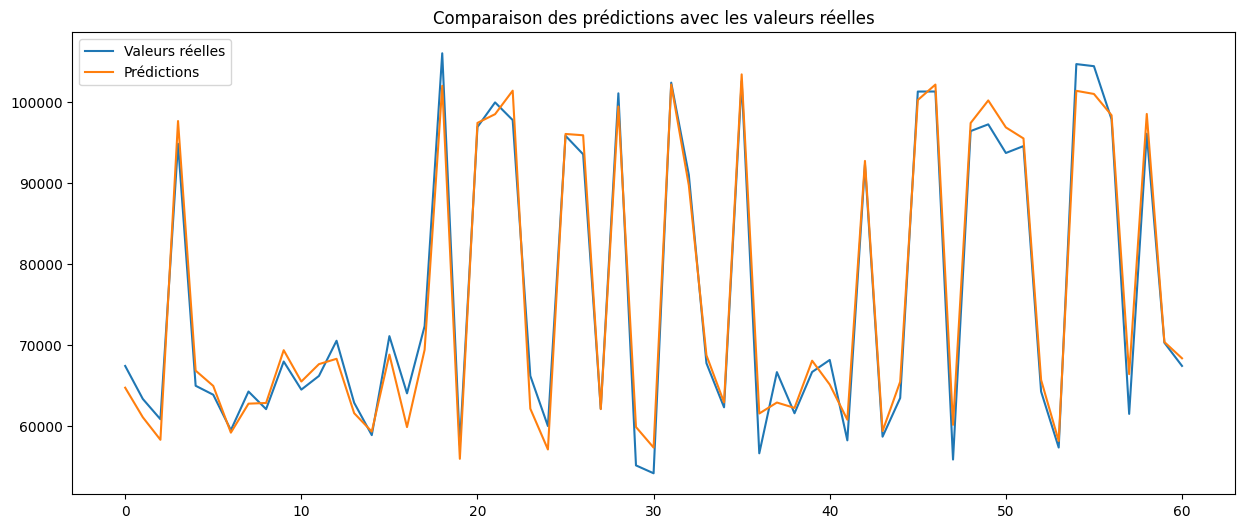

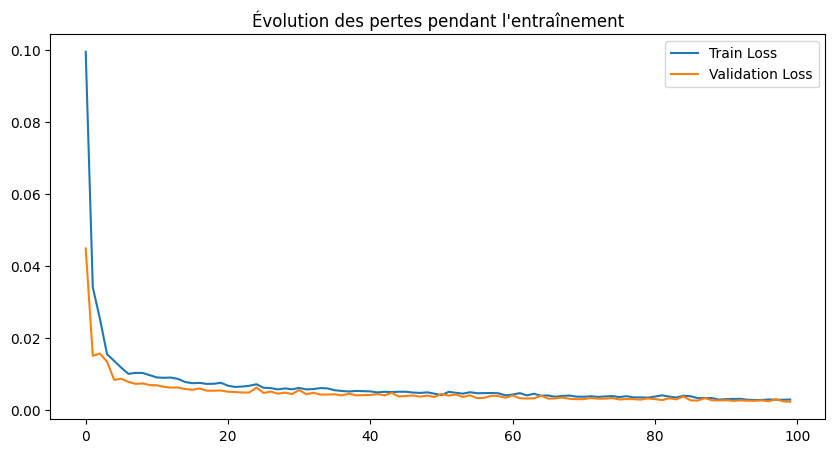

In [46]:
y_pred = model.predict(X_test)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler.inverse_transform(y_pred)

# Calcul des métriques
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualisation
plt.figure(figsize=(15,6))
plt.plot(y_test_orig, label='Valeurs réelles')
plt.plot(y_pred_orig, label='Prédictions')
plt.title('Comparaison des prédictions avec les valeurs réelles')
plt.legend()
plt.show()
    

# Visualisation de la courbe d'apprentissage
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution des pertes pendant l\'entraînement')
plt.legend()
plt.show()